# Radioactive Dating
```{index} Radioactive dating
```

In [13]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Principles of Radioactive Dating

In a closed system, the amount of a radiogenic daughter isotope that is present will increase over time, as the number of radioactive parent isotopes decreases due to radioactive decay. If the rate of radioactive decay, as defined by a decay constant, is known, we can use the increase in the abundance of the radiogenic daughter isotope to measure time. The rate of decay of a radioactive parent isotope is directly proportional to the number of atoms of this isotope that are present in a system.

Mathematically, this is expressed as:

$$\frac{dN}{dt} = -\lambda N$$

where $N$ is the number of parent atoms and $\lambda$ is the decay constant.

This equation can be rearranged and integrated:

$$\int_{N_0}^{N}\frac{dN}{N} = -\int_0^t\lambda dt$$

Here $N_0$ is the number of parent atoms present at $t = 0$, when the sample formed.

Following integration, we obtain:

$$\ln \left(\frac{N}{N_0}\right) = -\lambda t$$

This equation can also be expressed as:

$$\frac{N}{N_0} = e^{-\lambda t}$$

or:

$$N = N_0 e^{-\lambda t}$$

The half-life $t_{\frac{1}{2}}$ of a radioactive isotope is frequently referred to. It is the time it takes for half of the parent isotopes to decay away.  Therefore, at $t = t_{\frac{1}{2}}, N = \frac{N_0}{2}$

By substitution, we obtain:

$$\frac{N_0}{2} = N_0 e^{-\lambda t}$$

This can be rearranged to:

$$t_{\frac{1}{2}} = \frac{\ln 2}{\lambda} = \frac{0.693}{\lambda}$$

For $^{87}Rb$, $\lambda = 1.42 \times 10^{-11}\,yr^{-1}$. Hence, $t_{\frac{1}{2}} = 4.88 \times 10^{10}\,yr\,(\sim 50 Gyr)$

The number of radiogenic daughter nuclides $D^*$ produced by the decay of the parent since the formation of a sample is given by:

$$D^* = N_0 - N$$

The total number of daughter atoms D in the sample is given by:

$$D = D_0 + D^*$$

where $D_0$ is the number of daughter atoms already present in the sample at the time of its formation (“inherited” daughter).

By combining the decay equation for the parent nuclide with the expressions derived for the daughter isotopes, we obtain:

$$D^* = N_0(1-e^{-\lambda t})$$

and:

$$D = D_0 + N_0(1-e^{-\lambda t})$$

Below is the plot of the radioactive decay of the parent isotope ($N$) and the corresponding radiogenic ingrowth of the daughter isotope ($D$).

Text(0.2, 2, '$D_0 = 0\\%$')

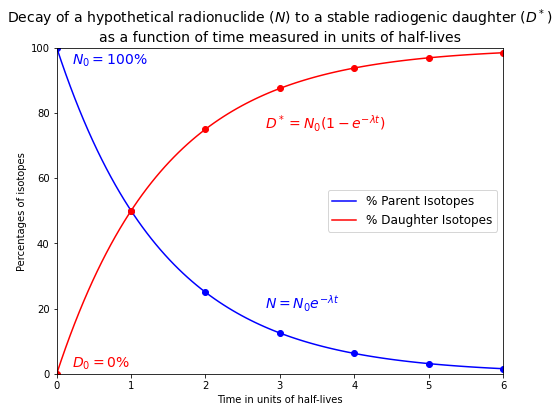

In [14]:
# function to calculate the number of remaining parent isotopes (N0) as a function of time in units of half-lives
def no_of_remaining_parent_from_half_lives(N0, times_half_lives):
    return N0 * 2**(-times_half_lives)


# Plot of the numbers of parent isotopes (N) and daughter isotopes (D*) against time in units of half-lives
times_half_lives = np.linspace(0, 6, 100)
full_times_half_lives = np.linspace(0, 6, 7)
N0 = 100  # 100% parent atom at initial
# D_star = N0-N
plt.figure(figsize=(8,6))
plt.plot(times_half_lives, no_of_remaining_parent_from_half_lives(N0, times_half_lives), 'b', label="% Parent Isotopes")
plt.plot(full_times_half_lives, no_of_remaining_parent_from_half_lives(N0, full_times_half_lives), 'bo')
plt.plot(times_half_lives, N0 - no_of_remaining_parent_from_half_lives(N0, times_half_lives), 'r', label="% Daughter Isotopes")
plt.plot(full_times_half_lives, N0 - no_of_remaining_parent_from_half_lives(N0, full_times_half_lives), 'ro')
plt.xlabel('Time in units of half-lives')
plt.ylabel('Percentages of isotopes')
plt.xlim([0, 6])
plt.ylim([0, 100])
plt.title("Decay of a hypothetical radionuclide ($N$) to a stable radiogenic daughter ($D^*$)\n\
as a function of time measured in units of half-lives", fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.text(2.8, 20, "$N = N_0 e^{-\lambda t}$", color='b', fontsize=14)
plt.text(0.2, 95, "$N_0 = 100\%$", color='b', fontsize=14)
plt.text(2.8, 75, "$D^* = N_0 (1-e^{-\lambda t})$", color='r', fontsize=14)
plt.text(0.2, 2, "$D_0 = 0\%$", color='r', fontsize=14)

It can be seen from the plot that

   * $N \rightarrow 0$ as $t \rightarrow \infty$, while $D^* \rightarrow N_0$ as $t \rightarrow \infty$.
   * Only about $3\%$ of the parent isotopes originally present remain after $5$ half-lives have passed.

With equations $D^* = N_0 - N$ and $D = D_0 + D^*$, we can also obtain:

$$D = D_0 + N_0 - N$$

As we have already defined,

$$N = N_0 e^{-\lambda t}$$

we can substitute to obtain:

$$D = D_0 + N e^{\lambda t} - N$$

This equation simplifies to:

$$D = D_0 + N (e^{\lambda t} - 1)$$

This is the basic equation of geochronology and it is of great importance in geochemistry.

## Problem Set 4 - Question 1

The present-day $^{238}U/^{235}U$ ratio of the Earth and other known Solar System objects is $137.88$. Let’s assume that this $U$ was formed in a supernova that occurred $7 \times 10^9$ yr ago. Calculate the initial atomic (or molar) $^{238}U/^{235}U$ ratio. What proportions of the originally produced $^{235}U$ and $^{238}U$ have decayed (to $^{207}Pb$ and $^{206}Pb$, respectively) since the supernova event?

<u>Solution</u>: 

The key tool is the equation:

$$N = N_0 e^{-\lambda t}$$

In [15]:
# function for calculating N from N0
def no_of_remaining_parent_from_decay_const(N0, decay_const, t):
    return N0 * np.exp(-decay_const*t)


# function for calculating N0 from N
def no_of_initial_parent_from_decay_const(N, decay_const, t):
    return N * np.exp(decay_const*t)



In [16]:
# today U-238/U-235 (N) = 137.88/1
N_U238_U235 = np.array([137.88, 1])
# age
age = 7 * 10**9
# decay constant of U-238 and U-235 from the handout
decay_const = np.array([1.551 * 10**-10, 9.849 * 10**-10])  # yr^-1
# find initial U-238/U-0235 (N0)
N0_U238_U235 = no_of_initial_parent_from_decay_const(N_U238_U235, decay_const, age)

# print answers
# The initial U-238/U-235 ratio is N0_U238/N0_U235
U238_U235_ratio_initial = N0_U238_U235[0]/N0_U238_U235[1]
print(f"The initial U-238/U-235 ratio is {U238_U235_ratio_initial:.3f}.")
# The percentage of the initial U having been decayed = (N0-N)/N0 * 100%
print(f"The percentage of the initial U-238 having been decayed is {(N0_U238_U235[0] - N_U238_U235[0])/N0_U238_U235[0]*100:.1f}%.")
print(f"The percentage of the initial U-235 having been decayed is {(N0_U238_U235[1] - N_U238_U235[1])/N0_U238_U235[1]*100:.1f}%.")

The initial U-238/U-235 ratio is 0.414.
The percentage of the initial U-238 having been decayed is 66.2%.
The percentage of the initial U-235 having been decayed is 99.9%.


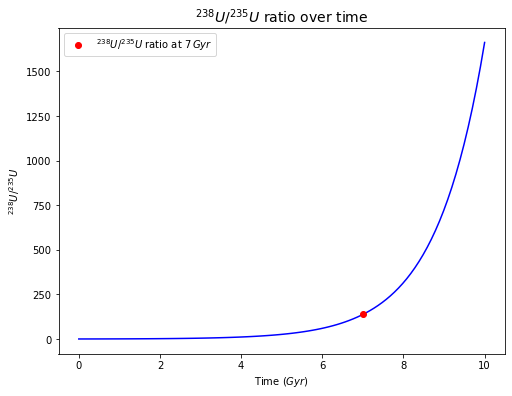

In [17]:
# Plot of U-238/U-235 ratio over time
# we already know the initial U-238/U-235 ratio from the answer (N0_U238_U235)
Gyr = np.linspace(0, 10, 100)  # age in unit of Gyr
# U-238
N0_U238 = N0_U238_U235[0]
decay_const_U238 = decay_const[0]
N_U238 = no_of_remaining_parent_from_decay_const(N0_U238, decay_const_U238, Gyr * 10**9)
# U-235
N0_U235 = N0_U238_U235[1]
decay_const_U235 = decay_const[1]
N_U235 = no_of_remaining_parent_from_decay_const(N0_U235, decay_const_U235, Gyr * 10**9)
# plot
plt.figure(figsize=(8,6))
U238_U235_ratio = N_U238/N_U235
plt.plot(Gyr, U238_U235_ratio, 'b')  # ratio over 10 Gyr
plt.plot(7, 137.88, 'ro', label="${^{238}U}/{^{235}U}$ ratio at $7\,Gyr$")  # ratio at 7 Gyr
plt.xlabel('Time ($Gyr$)')
plt.ylabel('$^{238}U/^{235}U$')
plt.title('$^{238}U/^{235}U$ ratio over time', fontsize=14)
plt.legend()

## References

- Lecture slide and Practical for Lecture 4 of the High-Temperature Geochemistry module